In [1]:
mars_data <- read.csv(file = 'phase1-multicoll-dust.csv')
head(mars_data)

HistMean,HistVar,LaplVar,MaxLapl,MaxVar,MaxAvgLapl,IQR,Deviation,C1AreaProp,C4AreaProp,...,SurfNumKP,AkazeNumKP,KazeNumKP,ORBNumKP,RidgeAreaProp,AvgMaxX,MaxY,MinVar,Filename,Output
143.0836,2331.683,74.15529,12.280502,229.6749,56.06253,79,0.09765229,0.3251953,0.3286743,...,56,1,19,8,0.24888295,66375,59817,217.1588,ESP_011492_1260_RED.NOMAP.browse-Block-2.jpg,1
125.8888,2111.322,129.02384,25.934509,240.8796,74.74995,58,138.00000000,0.3347778,0.3364258,...,67,0,40,14,0.29774536,65906,85152,190.5897,ESP_011492_1260_RED.NOMAP.browse-Block-3.jpg,1
128.2736,2013.886,122.46803,14.368271,538.4375,100.25463,64,1.06884848,0.3367310,0.3377075,...,69,0,42,20,0.33796696,100158,98016,399.1029,ESP_011492_1260_RED.NOMAP.browse-Block-7.jpg,1
113.4982,2952.701,98.66996,12.225693,524.0253,70.80311,95,0.66912175,0.3261108,0.3278198,...,67,3,37,19,0.29556285,110430,98022,377.4307,ESP_011492_1260_RED.NOMAP.browse-Block-8.jpg,1
153.8254,3143.006,21.11620,10.331787,392.8767,16.20496,85,0.21114020,0.2810059,0.3023682,...,34,0,11,0,0.11631003,172640,70386,371.2636,ESP_012326_2125_RED.NOMAP.browse-Block-1.jpg,1
173.3316,2094.097,13.06689,5.024765,147.9836,10.72460,59,0.09498196,0.2614746,0.2825317,...,26,0,4,0,0.08016952,234853,59118,439.4227,ESP_012326_2125_RED.NOMAP.browse-Block-2.jpg,1


In [2]:
colnames(mars_data)

[1] "HistMean"      "HistVar"       "LaplVar"       "MaxLapl"      
 [5] "MaxVar"        "MaxAvgLapl"    "IQR"           "Deviation"    
 [9] "C1AreaProp"    "C4AreaProp"    "SiftNumKP"     "SurfNumKP"    
[13] "AkazeNumKP"    "KazeNumKP"     "ORBNumKP"      "RidgeAreaProp"
[17] "AvgMaxX"       "MaxY"          "MinVar"        "Filename"     
[21] "Output"

In [3]:
model <- glm(Output~HistMean+LaplVar+MaxVar+MaxAvgLapl+IQR+Deviation+C1AreaProp+C4AreaProp+SiftNumKP+SurfNumKP+AkazeNumKP+KazeNumKP+ORBNumKP+RidgeAreaProp+AvgMaxX+MaxY+MinVar, family=binomial, data=mars_data)
summary(model)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Output ~ HistMean + LaplVar + MaxVar + MaxAvgLapl + 
    IQR + Deviation + C1AreaProp + C4AreaProp + SiftNumKP + SurfNumKP + 
    AkazeNumKP + KazeNumKP + ORBNumKP + RidgeAreaProp + AvgMaxX + 
    MaxY + MinVar, family = binomial, data = mars_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.93951   0.00000   0.00000   0.00099   2.80526  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.715e+01  1.037e+01  -3.583 0.000340 ***
HistMean      -3.471e-02  1.606e-02  -2.161 0.030695 *  
LaplVar       -9.655e-02  1.895e-02  -5.094 3.51e-07 ***
MaxVar        -9.487e-03  2.348e-03  -4.040 5.35e-05 ***
MaxAvgLapl    -2.953e-02  2.519e-02  -1.172 0.241006    
IQR            2.030e-02  1.619e-02   1.254 0.209951    
Deviation     -3.987e-04  3.109e-04  -1.282 0.199676    
C1AreaProp     1.206e+01  2.783e+01   0.433 0.664757    
C4AreaProp     1.226e+02  5.005e+01   2.449 0.014315 *  
SiftNumKP      4.867e

In [4]:
dffits = data.frame(influence.measures(model)[1])$infmat.dffit
dffits_threshold = 2*(20*length(dffits)^(1/2))
hat_diag =  data.frame(influence.measures(model)[1])$infmat.hat
hat_diag_threshold = 2*(20/length(hat_diag))

In [5]:
res = residuals(model)

In [6]:
print("Diagonising by dffits")
for(i in 1:length(dffits))
{
        if (abs(dffits[i]) > dffits_threshold)
            print(i)
}
print("Diagnosing by hat matrix")
for(i in 1:length(hat_diag))
{
        if (abs(hat_diag[i]) > hat_diag_threshold)
            {
                if (abs(res[i]) > 2)
                    {
                        print(i)
                    }
            }
}

[1] "Diagonising by dffits"
[1] "Diagnosing by hat matrix"
[1] 351
[1] 393
[1] 1095
[1] 1314


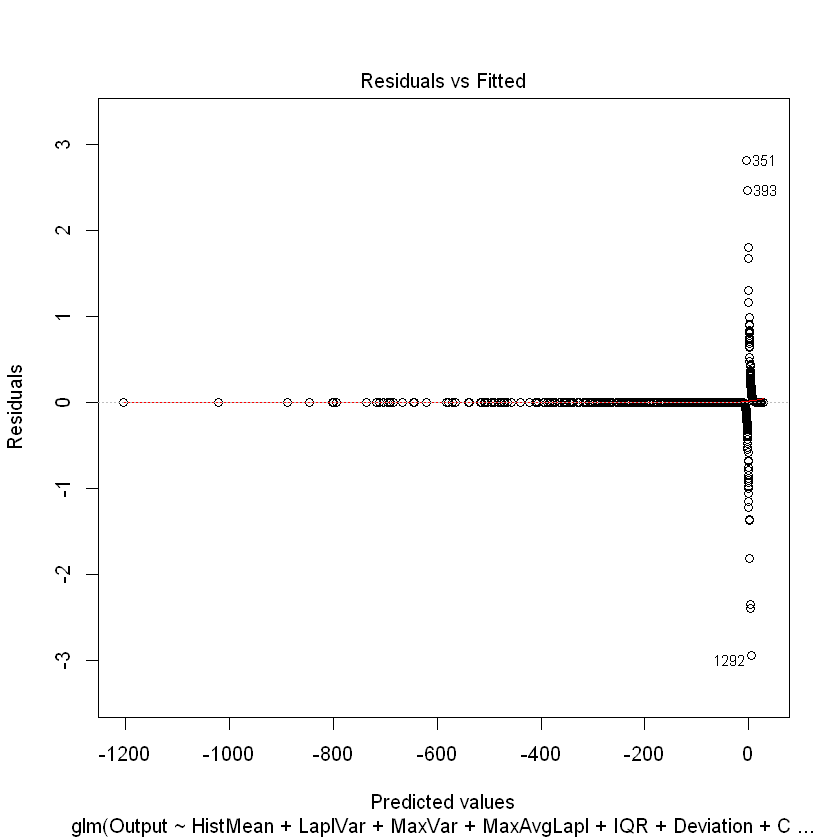

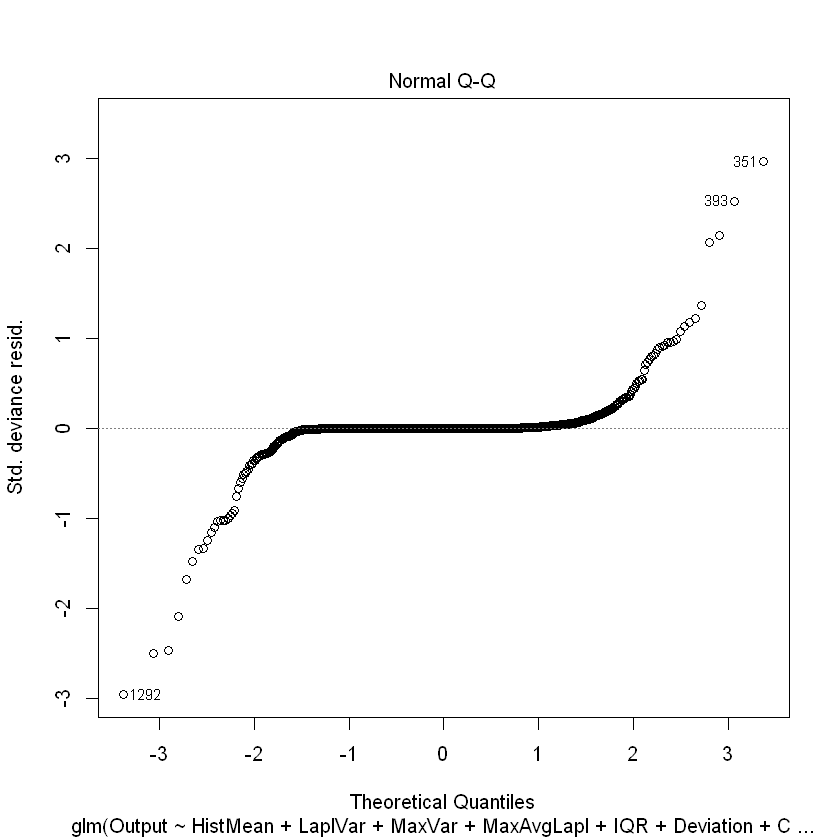

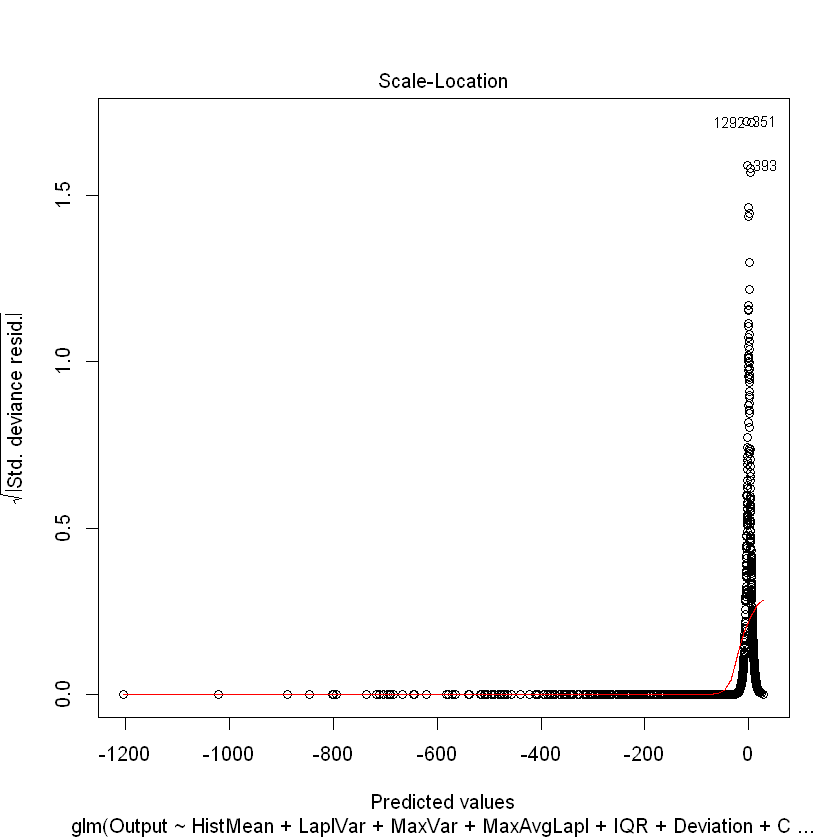

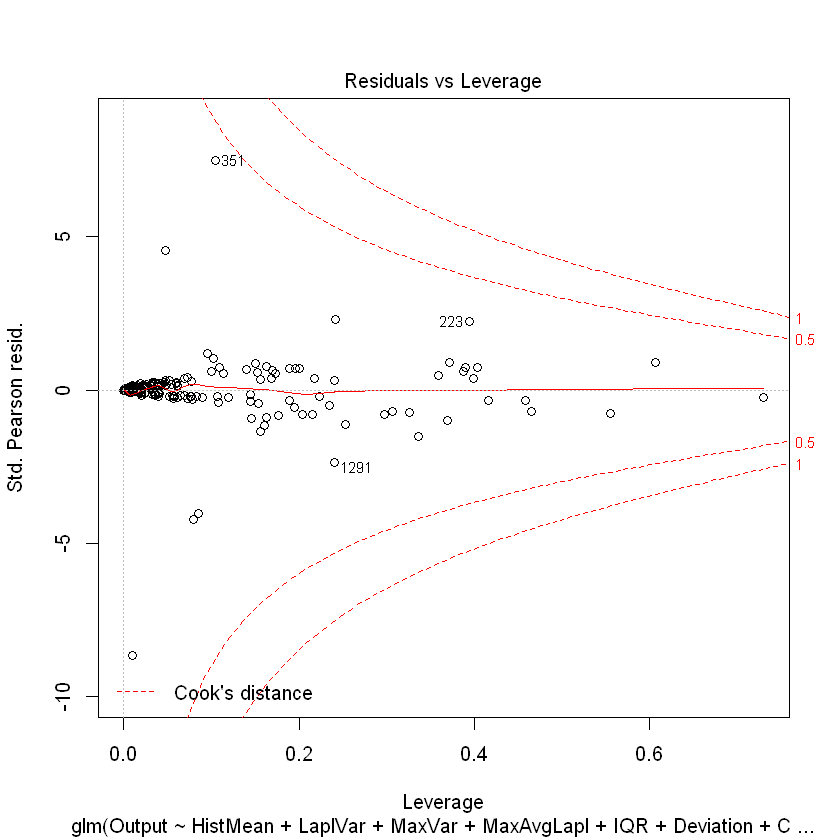

In [7]:
plot(model)